## Dataset Description

| Feature | Category | Column Name | Data Type | Values (if applicable) |
|---------|----------|------------|-----------|-------------------------|
| Age | Objective Feature | age | int (years) | - |
| Height | Objective Feature | height | float (m) | - |
| Weight | Objective Feature | weight | float (kg) | - |
| Gender | Objective Feature | gender | categorical | 0: women, 1: men |
| Systolic blood pressure | Examination Feature | ap_hi | int | - |
| Diastolic blood pressure | Examination Feature | ap_lo | int | - |
| Cholesterol | Examination Feature | cholesterol | categorical | 1: normal, 2: above normal, 3: well above normal |
| Glucose | Examination Feature | gluc | categorical | 1: normal, 2: above normal, 3: well above normal |
| Smoking | Subjective Feature | smoke | binary | 0: no, 1: yes |
| Alcohol intake | Subjective Feature | alco | binary | 0: no, 1: yes |
| Physical activity | Subjective Feature | active | binary | 0: no, 1: yes |
| Presence or absence of cardiovascular disease | Target Variable | cardio | binary | 0: no, 1: yes |


In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

## Load Data

In [ ]:
#Load data
import kagglehub
import pandas as pd
from io import StringIO
from kagglehub import KaggleDatasetAdapter

# Set the path to the file you'd like to load
file_path = "cardio_train.csv"

# Load the latest version from Kaggle
df_raw = kagglehub.load_dataset(
  KaggleDatasetAdapter.PANDAS,
  "sulianova/cardiovascular-disease-dataset",
  file_path
)

# Convert the raw df into a CSV string format for proper reading
csv_data = df_raw.to_csv(index=False, header=True)

# Now load it properly with the correct delimiter and encoding
df = pd.read_csv(StringIO(csv_data), delimiter=";", encoding="ISO-8859-1")

# Display the first few records
display(df.head(10))

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0
5,8,21914,1,151,67.0,120,80,2,2,0,0,0,0
6,9,22113,1,157,93.0,130,80,3,1,0,0,1,0
7,12,22584,2,178,95.0,130,90,3,3,0,0,1,1
8,13,17668,1,158,71.0,110,70,1,1,0,0,1,0
9,14,19834,1,164,68.0,110,60,1,1,0,0,0,0


In [19]:
# Perform EDA
print(df.describe(), '\n\n')
print(df.info(), '\n\n')
print(df.isna().sum(), '\n\n')
print(df.nunique())

                 id           age        gender        height        weight  \
count  70000.000000  70000.000000  70000.000000  70000.000000  70000.000000   
mean   49972.419900  19468.865814      1.349571    164.359229     74.205690   
std    28851.302323   2467.251667      0.476838      8.210126     14.395757   
min        0.000000  10798.000000      1.000000     55.000000     10.000000   
25%    25006.750000  17664.000000      1.000000    159.000000     65.000000   
50%    50001.500000  19703.000000      1.000000    165.000000     72.000000   
75%    74889.250000  21327.000000      2.000000    170.000000     82.000000   
max    99999.000000  23713.000000      2.000000    250.000000    200.000000   

              ap_hi         ap_lo   cholesterol          gluc         smoke  \
count  70000.000000  70000.000000  70000.000000  70000.000000  70000.000000   
mean     128.817286     96.630414      1.366871      1.226457      0.088129   
std      154.011419    188.472530      0.680250    

## Feature Engineering/Selection

In [20]:
# Drop id column

df.drop(columns=['id'], inplace=True)

In [21]:
# Convert height from cm to m
df['height'] = (df['height']/100)

# Convert age from days to years
df['age'] = (df['age']/365).astype(int)

# Create BMI Feature
df["bmi"] = df["weight"]/(df["height"]**2)

# Create Pulse Pressure Feature
df['pulse_pressure'] = df['ap_hi'] - df['ap_lo']

display(df.head(15))

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,bmi,pulse_pressure
0,50,2,1.68,62.0,110,80,1,1,0,0,1,0,21.967120,30
1,55,1,1.56,85.0,140,90,3,1,0,0,1,1,34.927679,50
2,51,1,1.65,64.0,130,70,3,1,0,0,0,1,23.507805,60
3,48,2,1.69,82.0,150,100,1,1,0,0,1,1,28.710479,50
4,47,1,1.56,56.0,100,60,1,1,0,0,0,0,23.011177,40
5,60,1,1.51,67.0,120,80,2,2,0,0,0,0,29.384676,40
6,60,1,1.57,93.0,130,80,3,1,0,0,1,0,37.729725,50
7,61,2,1.78,95.0,130,90,3,3,0,0,1,1,29.983588,40
8,48,1,1.58,71.0,110,70,1,1,0,0,1,0,28.440955,40
9,54,1,1.64,68.0,110,60,1,1,0,0,0,0,25.282570,50


In [22]:
# Apply Binary encoding on gender
df['gender'] = df['gender'].replace([1, 2], [0, 1])

display(df.head(15))

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,bmi,pulse_pressure
0,50,1,1.68,62.0,110,80,1,1,0,0,1,0,21.967120,30
1,55,0,1.56,85.0,140,90,3,1,0,0,1,1,34.927679,50
2,51,0,1.65,64.0,130,70,3,1,0,0,0,1,23.507805,60
3,48,1,1.69,82.0,150,100,1,1,0,0,1,1,28.710479,50
4,47,0,1.56,56.0,100,60,1,1,0,0,0,0,23.011177,40
5,60,0,1.51,67.0,120,80,2,2,0,0,0,0,29.384676,40
6,60,0,1.57,93.0,130,80,3,1,0,0,1,0,37.729725,50
7,61,1,1.78,95.0,130,90,3,3,0,0,1,1,29.983588,40
8,48,0,1.58,71.0,110,70,1,1,0,0,1,0,28.440955,40
9,54,0,1.64,68.0,110,60,1,1,0,0,0,0,25.282570,50


In [23]:
from sklearn.preprocessing import OrdinalEncoder

# Apply Ordinal Encoding
encoder = OrdinalEncoder(categories=[[1, 2, 3], [1, 2, 3]]) 
df[['cholesterol', 'gluc']] = encoder.fit_transform(df[['cholesterol', 'gluc']]).astype(int)

In [24]:
# Handle Physiologically Impossible Readings and  Clinically Unrealistic Readings
df_clean = df.loc[( (df['ap_hi'] > 0) & (df['ap_hi'] < 370) ) & ( (df['ap_lo'] > 0) & (df['ap_lo'] < 360) ) & (df['ap_hi'] > df['ap_lo']) & (df['bmi'] < 204) & (df['bmi'] > 6)]

In [25]:
print(df_clean.info(), '\n\n')
print(df_clean.describe())


<class 'pandas.core.frame.DataFrame'>
Index: 68704 entries, 0 to 69999
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             68704 non-null  int32  
 1   gender          68704 non-null  int64  
 2   height          68704 non-null  float64
 3   weight          68704 non-null  float64
 4   ap_hi           68704 non-null  int64  
 5   ap_lo           68704 non-null  int64  
 6   cholesterol     68704 non-null  int32  
 7   gluc            68704 non-null  int32  
 8   smoke           68704 non-null  int64  
 9   alco            68704 non-null  int64  
 10  active          68704 non-null  int64  
 11  cardio          68704 non-null  int64  
 12  bmi             68704 non-null  float64
 13  pulse_pressure  68704 non-null  int64  
dtypes: float64(3), int32(3), int64(8)
memory usage: 7.1 MB
None 


                age        gender        height        weight         ap_hi  \
count  68704.000000  68704.00

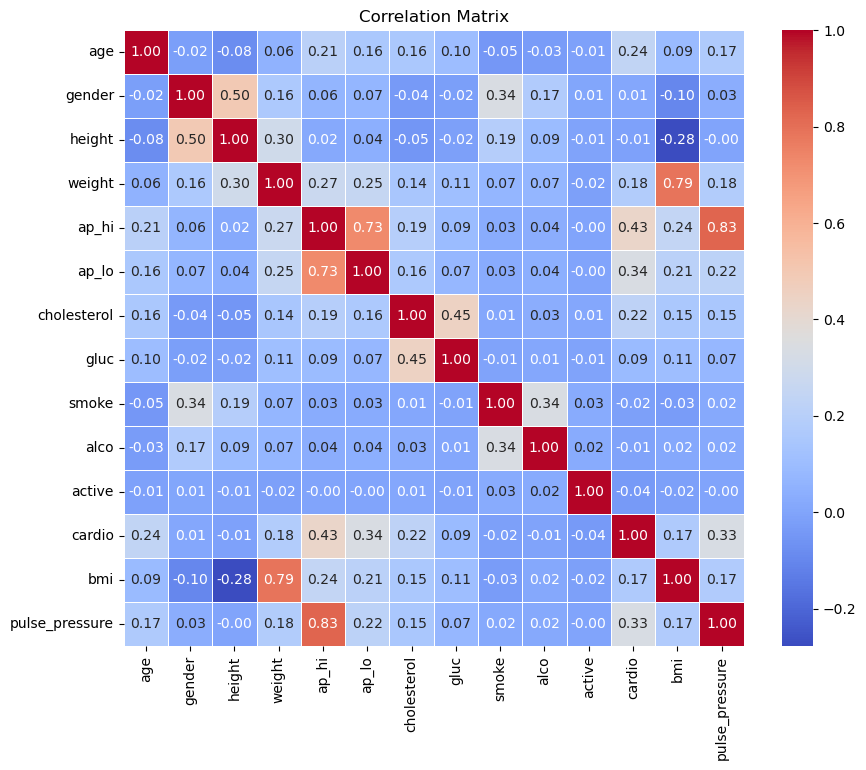

In [26]:
# CORRELATION MATRIX

# Set up figure
plt.figure(figsize=(10, 8))

# Draw correlation matrix
sns.heatmap(df_clean.corr(), annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)

# Show the figure
plt.title('Correlation Matrix')
plt.show()

In [27]:
# Drop correlated features
df_clean.drop(columns=['ap_hi', 'ap_lo', 'height', 'weight'], inplace= True)
display(df_clean.head(10))

,age,gender,cholesterol,gluc,smoke,alco,active,cardio,bmi,pulse_pressure
0,50,1,0,0,0,0,1,0,21.967120,30
1,55,0,2,0,0,0,1,1,34.927679,50
2,51,0,2,0,0,0,0,1,23.507805,60
3,48,1,0,0,0,0,1,1,28.710479,50
4,47,0,0,0,0,0,0,0,23.011177,40
5,60,0,1,1,0,0,0,0,29.384676,40
6,60,0,2,0,0,0,1,0,37.729725,50
7,61,1,2,2,0,0,1,1,29.983588,40
8,48,0,0,0,0,0,1,0,28.440955,40
9,54,0,0,0,0,0,0,0,25.282570,50


## Scaling Features

In [28]:
from sklearn.preprocessing import StandardScaler

features = df_clean[['age', 'gender', 'cholesterol', 'gluc', 'smoke', 'alco', 'active', 'bmi', 'pulse_pressure']]
target = df_clean[['cardio']]

scaler = StandardScaler()
features[:] = scaler.fit_transform(features[:])

display(features.head(10))

,age,gender,cholesterol,gluc,smoke,alco,active,bmi,pulse_pressure
0,-0.417769,1.366939,-0.537126,-0.394820,-0.310463,-0.237383,0.494723,-0.959598,-1.309069
1,0.320898,-0.731561,2.408846,-0.394820,-0.310463,-0.237383,0.494723,1.284572,0.391285
2,-0.270036,-0.731561,2.408846,-0.394820,-0.310463,-0.237383,-2.021335,-0.692822,1.241462
3,-0.713236,1.366939,-0.537126,-0.394820,-0.310463,-0.237383,0.494723,0.208040,0.391285
4,-0.860969,-0.731561,-0.537126,-0.394820,-0.310463,-0.237383,-2.021335,-0.778816,-0.458892
5,1.059566,-0.731561,0.935860,1.355113,-0.310463,-0.237383,-2.021335,0.324780,-0.458892
6,1.059566,-0.731561,2.408846,-0.394820,-0.310463,-0.237383,0.494723,1.769757,0.391285
7,1.207299,1.366939,2.408846,3.105047,-0.310463,-0.237383,0.494723,0.428484,-0.458892
8,-0.713236,-0.731561,-0.537126,-0.394820,-0.310463,-0.237383,0.494723,0.161371,-0.458892
9,0.173165,-0.731561,-0.537126,-0.394820,-0.310463,-0.237383,-2.021335,-0.385515,0.391285


# Modeling: Logistic Regression

In [29]:
from sklearn.model_selection import train_test_split

# Split data into training and test data
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size = 0.30,  random_state = 30)

In [30]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()

# Fit the training data onto the Logistic Regression Model
lr.fit(X_train, y_train)

# Make predictions using the test data set
lr_pred = lr.predict(X_test)

## Evaluation

In [31]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Compute the accuracy, confusion matrix and classification report
lr_accuracy = accuracy_score(y_test, lr_pred)
lr_confusion = confusion_matrix(y_test, lr_pred)
lr_classification = classification_report(y_test, lr_pred)
print(f"The accuracy is: {lr_accuracy:.4f}", "\n\n", "Below is the confusion matrix:\n", lr_confusion, '\n\n', "The classification report is as follows:\n", lr_classification)

The accuracy is: 0.6946 

 Below is the confusion matrix:
 [[7890 2587]
 [3708 6427]] 

 The classification report is as follows:
               precision    recall  f1-score   support

           0       0.68      0.75      0.71     10477
           1       0.71      0.63      0.67     10135

    accuracy                           0.69     20612
   macro avg       0.70      0.69      0.69     20612
weighted avg       0.70      0.69      0.69     20612



## Hyperparameter Tuning

In [32]:
from sklearn.model_selection import GridSearchCV

# Define parameter grid
param_grid = {
    'C': [0.01, 0.1, 1, 10],               # Different C values for stronger/weaker regularization
    'solver': ['liblinear', 'lbfgs', 'saga'],      # Solver Parameters (optimization algorithm)
    'penalty': ['l1', 'l2']                        # Penalty
}

# Perform Grid Search
grid_search = GridSearchCV(LogisticRegression(), param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Best parameters
print("Best Parameters:", grid_search.best_params_)


Best Parameters: {'C': 0.1, 'penalty': 'l1', 'solver': 'liblinear'}


In [33]:
# Re-evaluate model with parameters from hypertuning
model = LogisticRegression(C=0.1, solver='liblinear', penalty='l1')  # Adjust C for stronger/weaker regularization

# Fit tuned model onto the test data
model.fit(X_train, y_train)

# Make predictions using the tuned model to compare metrics 
y_pred = model.predict(X_test)

# Evaluate metrics of the tuned model and compare with metrics before hyperparameter tuning
lr_accuracy = accuracy_score(y_test, y_pred)
lr_confusion = confusion_matrix(y_test, y_pred)
lr_classification = classification_report(y_test, y_pred)
print(f"The accuracy is: {lr_accuracy:.4f}", "\n\n", "Below is the confusion matrix:\n", lr_confusion, '\n\n', "The classification report is as follows:\n", lr_classification)

The accuracy is: 0.6945 

 Below is the confusion matrix:
 [[7896 2581]
 [3715 6420]] 

 The classification report is as follows:
               precision    recall  f1-score   support

           0       0.68      0.75      0.71     10477
           1       0.71      0.63      0.67     10135

    accuracy                           0.69     20612
   macro avg       0.70      0.69      0.69     20612
weighted avg       0.70      0.69      0.69     20612



In [34]:
pd.DataFrame({'coeff': np.exp(model.coef_[0])}, 
             index=X_train.columns).sort_values(by='coeff', ascending=False)

,coeff
pulse_pressure,2.054192
cholesterol,1.470634
age,1.461483
bmi,1.277886
gender,1.058343
alco,0.971355
smoke,0.950506
gluc,0.921556
active,0.919728


# Modeling: Random Forest

In [37]:
# Handle Physiologically Impossible Readings and  Clinically Unrealistic Readings
df_rf = df.loc[( (df['ap_hi'] > 0) & (df['ap_hi'] < 370) ) & ( (df['ap_lo'] > 0) & (df['ap_lo'] < 360) ) & (df['ap_hi'] > df['ap_lo']) & (df['bmi'] < 204) & (df['bmi'] > 6)]

# Scaling Features
features = df_rf[['age', 'weight', 'height', 'gender', 'cholesterol', 'gluc', 'smoke', 'alco', 'active', 'bmi', 'ap_hi', 'ap_lo', 'pulse_pressure']]
target = df_rf[['cardio']]

scaler = StandardScaler()
features[:] = scaler.fit_transform(features[:])

# Split data into training and test data
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size = 0.30,  random_state = 30)

In [38]:
from sklearn.ensemble import RandomForestClassifier

# Initialize RandomForestClassifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Fit the classifier to the training data
rf_classifier.fit(X_train, y_train)

# Make predictions
rf_pred = rf_classifier.predict(X_test)

## Evaluation

In [39]:
# Compute the accuracy, confusion matrix and classification report
rf_accuracy = accuracy_score(y_test, rf_pred)
rf_confusion = confusion_matrix(y_test, rf_pred)
rf_classification = classification_report(y_test, rf_pred)
print(f"The accuracy is: {rf_accuracy:.4f}", "\n\n", "Below is the confusion matrix:\n", rf_confusion, '\n\n', "The classification report is as follows:\n", rf_classification)

The accuracy is: 0.7059 

 Below is the confusion matrix:
 [[7552 2925]
 [3137 6998]] 

 The classification report is as follows:
               precision    recall  f1-score   support

           0       0.71      0.72      0.71     10477
           1       0.71      0.69      0.70     10135

    accuracy                           0.71     20612
   macro avg       0.71      0.71      0.71     20612
weighted avg       0.71      0.71      0.71     20612



## Feature Selection

In [40]:
# Get feature importance
feature_importances = pd.DataFrame({"Feature": X_train.columns, "Importance": rf_classifier.feature_importances_})
feature_importances = feature_importances.sort_values(by="Importance", ascending=False)

# Display top features
print(feature_importances)

           Feature  Importance
9              bmi    0.186909
0              age    0.159691
1           weight    0.138448
10           ap_hi    0.135175
2           height    0.131724
11           ap_lo    0.067899
12  pulse_pressure    0.065160
4      cholesterol    0.041356
3           gender    0.020172
5             gluc    0.019258
8           active    0.016374
6            smoke    0.009855
7             alco    0.007979


In [41]:
# Select most relevant features (i.e top 9 in our case)
top_features = feature_importances["Feature"][:9].values
X_train_selected = X_train[top_features]
X_test_selected = X_test[top_features]

In [42]:
# Reevaluate model with only relevant features selected

# Fit the classifier to the training data
rf_classifier.fit(X_train_selected, y_train)

# Make predictions
rf_pred_selected = rf_classifier.predict(X_test_selected)

# Calculate accuracy and classification report
rf_accuracy = accuracy_score(y_test, rf_pred_selected)
rf_confusion = confusion_matrix(y_test, rf_pred_selected)
rf_classification = classification_report(y_test, rf_pred_selected)
print(f"The accuracy is: {rf_accuracy:.4f}", "\n\n", "Below is the confusion matrix:\n", rf_confusion, '\n\n', "The classification report is as follows:\n", rf_classification)

The accuracy is: 0.6969 

 Below is the confusion matrix:
 [[7407 3070]
 [3178 6957]] 

 The classification report is as follows:
               precision    recall  f1-score   support

           0       0.70      0.71      0.70     10477
           1       0.69      0.69      0.69     10135

    accuracy                           0.70     20612
   macro avg       0.70      0.70      0.70     20612
weighted avg       0.70      0.70      0.70     20612



## Hyperparamter Tuning

In [43]:
param_grid = {
    'n_estimators': [100, 200, 500],
    'max_depth': [5, 10, 15, 20],
    'max_features': ['sqrt', 'log2']
}

# Initialize Random Forest
rf = RandomForestClassifier(random_state=42)

# Grid Search
grid_search = GridSearchCV(rf, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)

# Best parameters
print(grid_search.best_params_)

{'max_depth': 10, 'max_features': 'sqrt', 'n_estimators': 500}


In [44]:
# Reevaluate tuned model
rf_model = RandomForestClassifier(max_depth = 10, max_features = 'sqrt', n_estimators= 500, random_state=42)

# Fit tuned model onto train data
rf_model.fit(X_train_selected, y_train)

# Make predictions
y_pred = rf_model.predict(X_test_selected)

# Calculate accuracy and classification report
rf_accuracy = accuracy_score(y_test, y_pred)
rf_confusion = confusion_matrix(y_test, y_pred)
rf_classification = classification_report(y_test, y_pred)
print(f"The accuracy is: {rf_accuracy:.4f}", "\n\n", "Below is the confusion matrix:\n", rf_confusion, '\n\n', "The classification report is as follows:\n", rf_classification)

The accuracy is: 0.7306 

 Below is the confusion matrix:
 [[8186 2291]
 [3262 6873]] 

 The classification report is as follows:
               precision    recall  f1-score   support

           0       0.72      0.78      0.75     10477
           1       0.75      0.68      0.71     10135

    accuracy                           0.73     20612
   macro avg       0.73      0.73      0.73     20612
weighted avg       0.73      0.73      0.73     20612

